# chapter 04. 추측통계의 기본

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

## 4.1 모집단과 표본

In [8]:
# 무작위추출 : np.random.choice 함수
# np.random.choice 함수 : 기본 설정으로 복원추출을 수행
np.random.choice([1, 2, 3], 3)

array([3, 1, 3])

In [11]:
# 비복원추출 수행 : replace=False 설정
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 3, 1])

In [14]:
# 시드 설정
np.random.seed(0)
np.random.choice([1, 2, 3], 3)  # 시드를 0으로 설정한 상황에서는 같은 난수결과만 발생. (코드 재현성)

array([1, 2, 1])

In [17]:
# 400개 데이터 (scores) 중 20개 무작위 추출
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [18]:
# 모평균
scores.mean()

69.530

In [19]:
# 시드가 설정되었더라도, 반복문으로 choice 함수를 연속으로 실행하면 각 결과는 다르게 나온다.
# 중요한 것은, 다른 컴퓨터에서 np.random.seed(0) 로 설정한 후 for 문으로 5번 돌리면 아래와 같은 결과가 나온다는 것이다.
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균 ', sample.mean())

1번째 무작위추출로 얻은 표본평균  72.45
2번째 무작위추출로 얻은 표본평균  63.7
3번째 무작위추출로 얻은 표본평균  66.05
4번째 무작위추출로 얻은 표본평균  71.7
5번째 무작위추출로 얻은 표본평균  74.15


## 4.2 확률 모형

#### 4.2.2 확률분포

In [20]:
# 불공정한 주사위 설정
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [21]:
np.random.choice(dice, p=prob)

1

In [22]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [23]:
# 도수분포표 작성
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq, 'relative frequency':freq/num_trial},
             index=pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


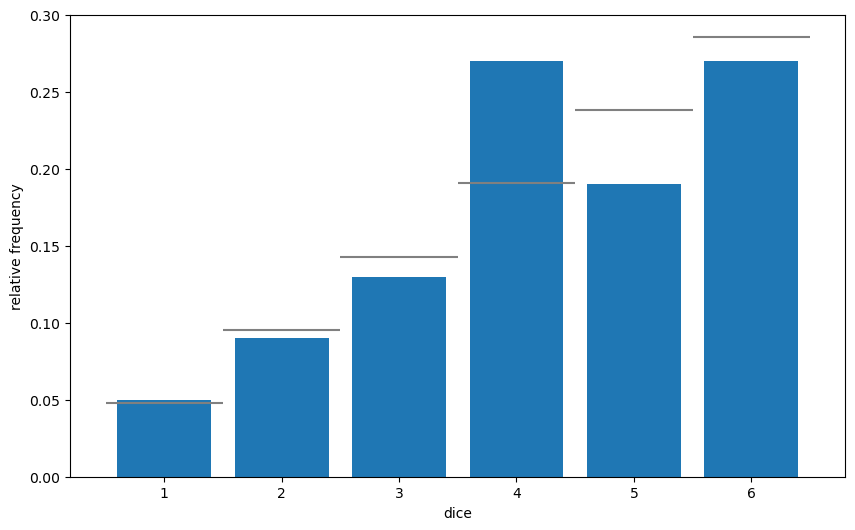

In [24]:
# 히스토그램 그리기 (100번 시행한 결과)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

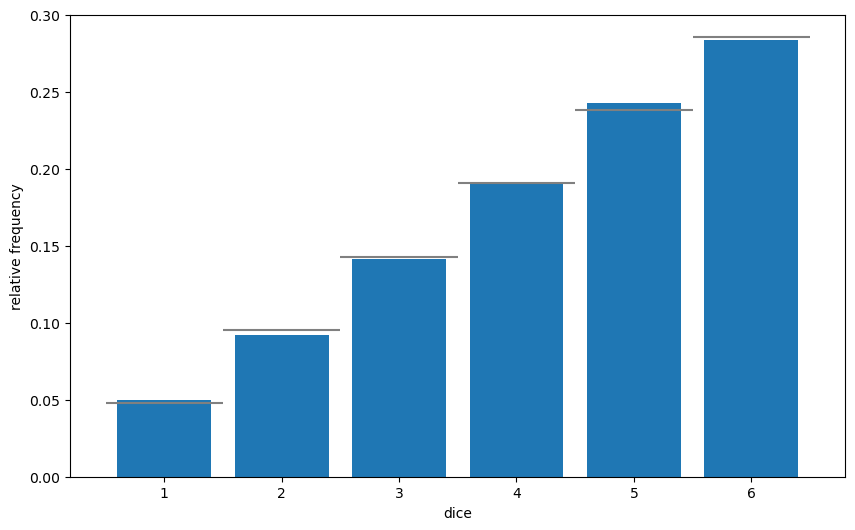

In [25]:
# 히스토그램 그리기 (10000번 시행한 결과)
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 4.3 추측통계의 확률

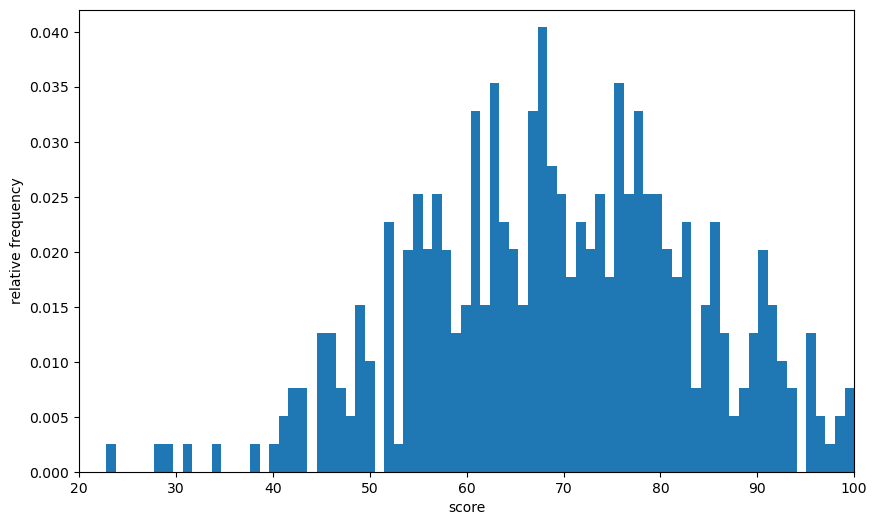

In [26]:
# 전교생의 시험 점수(scores) 분포 히스토그램 그리기
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(1, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [27]:
np.random.choice(scores)

89

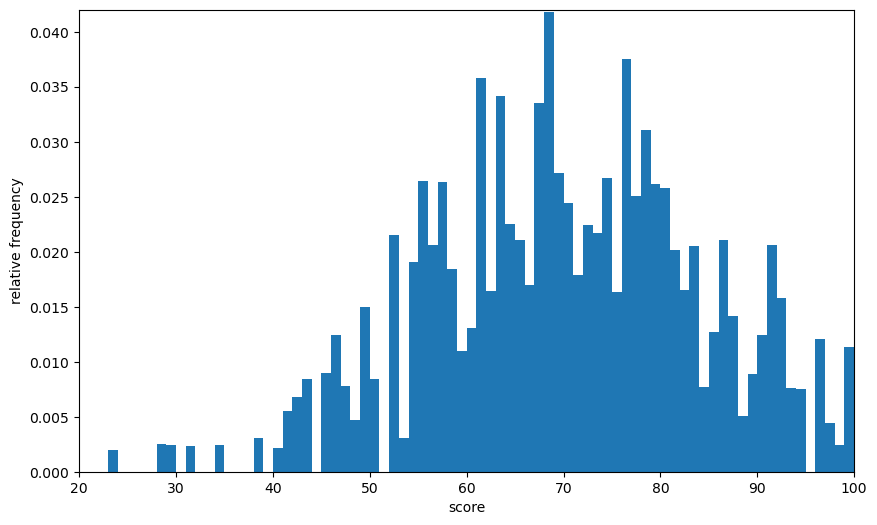

In [28]:
# 무작위 복원추출로 샘플 사이즈가 10000인 표본을 추출하여, 결과를 히스토그램으로 그리기
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

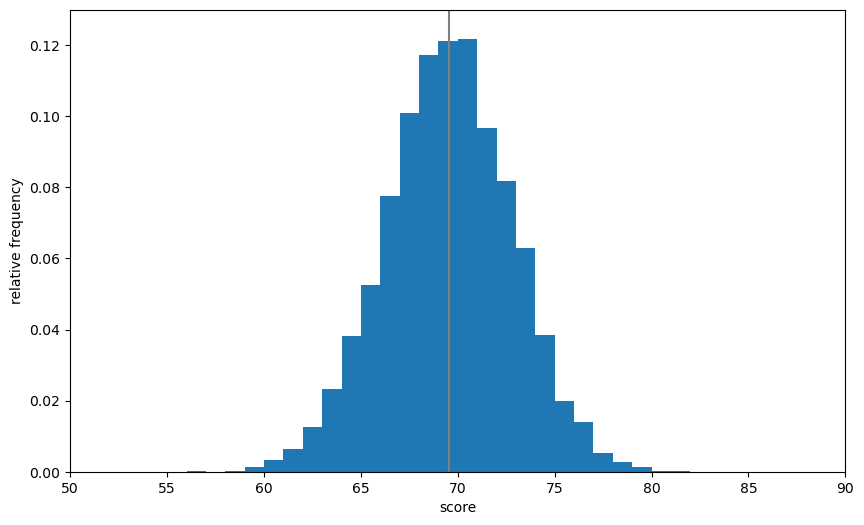

In [30]:
# 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서, 그 결과를 히스토그램으로 그리기
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()